In [2]:
# 오류 back propagation 알고리즘 구현
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def initialize_weights(input_size, hidden_size, output_size):
    np.random.seed(42)
    W1 = np.random.randn(input_size, hidden_size) * 0.1
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * 0.1
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2

def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

def compute_loss(y_true, y_pred):
    m = y_true.shape[0]
    loss = np.sum((y_true - y_pred) ** 2) / (2 * m)
    return loss

def compute_mse(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

def back_propagation(X, y, Z1, A1, Z2, A2, W1, b1, W2, b2, learning_rate):
    m = X.shape[0]
    dZ2 = A2 - y
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    
    return W1, b1, W2, b2

In [2]:
# 데이터 7:3으로 나누기
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기
data = pd.read_csv("NN_data.csv")

# Feature와 label 분리
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# y_train과 y_test를 2D array로 변환
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

Epoch 0, Loss: 1.5380083940331182
Epoch 100, Loss: 0.8747222499016
Epoch 200, Loss: 0.8611867806764716
Epoch 300, Loss: 0.8611112479178816
Epoch 400, Loss: 0.8611111112940408
Epoch 500, Loss: 0.8611111111146711
Epoch 600, Loss: 0.8611111111116454
Epoch 700, Loss: 0.8611111111111851
Epoch 800, Loss: 0.8611111111111194
Epoch 900, Loss: 0.8611111111111118


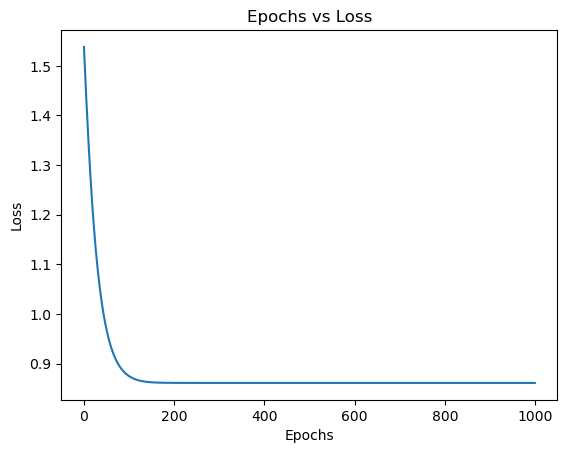

In [3]:
# training set 삽입하여 인공신경망 훈련하기
# 하이퍼 파라미터 설정
input_size = X_train.shape[1]
hidden_size = 10  # 임의로 설정
output_size = 1
learning_rate = 0.01
epochs = 1000

# 가중치 초기화
W1, b1, W2, b2 = initialize_weights(input_size, hidden_size, output_size)

# 훈련
losses = []
for epoch in range(epochs):
    Z1, A1, Z2, A2 = forward_propagation(X_train, W1, b1, W2, b2)
    loss = compute_loss(y_train, A2)
    losses.append(loss)
    W1, b1, W2, b2 = back_propagation(X_train, y_train, Z1, A1, Z2, A2, W1, b1, W2, b2, learning_rate)
    
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# 학습 결과 그래프
import matplotlib.pyplot as plt

plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')
plt.show()


In [1]:
# 하이퍼 파라매터 튜닝을 하여 최적의 매개변수을 찾기
from sklearn.model_selection import GridSearchCV

# Grid Search용 파라미터 범위 설정
param_grid = {
    'hidden_size': [5, 10, 20],
    'learning_rate': [0.01, 0.001, 0.0001],
    'epochs': [1000, 2000, 3000]
}

# 그리드 탐색 함수 정의
def train_with_params(hidden_size, learning_rate, epochs):
    W1, b1, W2, b2 = initialize_weights(input_size, hidden_size, output_size)
    losses = []
    for epoch in range(epochs):
        Z1, A1, Z2, A2 = forward_propagation(X_train, W1, b1, W2, b2)
        loss = compute_loss(y_train, A2)
        losses.append(loss)
        W1, b1, W2, b2 = back_propagation(X_train, y_train, Z1, A1, Z2, A2, W1, b1, W2, b2, learning_rate)
    return losses[-1]

best_params = None
best_loss = float('inf')

for hidden_size in param_grid['hidden_size']:
    for learning_rate in param_grid['learning_rate']:
        for epochs in param_grid['epochs']:
            loss = train_with_params(hidden_size, learning_rate, epochs)
            if loss < best_loss:
                best_loss = loss
                best_params = {'hidden_size': hidden_size, 'learning_rate': learning_rate, 'epochs': epochs}

print("Best parameters:", best_params)

NameError: name 'initialize_weights' is not defined

In [ ]:
# Test set 삽입하여 성능을 평가하기